In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [64]:
df = pd.read_csv('Bengaluru_House_Data.csv')
print("data imported successfully")

data imported successfully


In [65]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [66]:
df.shape

(13320, 9)

# Data cleaning

In [67]:
df.groupby('area_type')['area_type'].agg('count')
# df['area_type'].value_counts() #does the same job

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [68]:
#dropped the columns not requried
df1 = df.drop(['area_type','availability','society','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [69]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [70]:
df2 = df1.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Improving the Size column

In [71]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [72]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split()[0]))

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df2.head()
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [74]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [75]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [76]:
#getting all the types of values in the coulmn total_sqft that are not float
def checkFloat(x):
    try:
        x= float(x)
        return True
    except:
        return False
    return True
df3=df2[~df2['total_sqft'].apply(checkFloat)]
df3['total_sqft'].head(15)

30        2100 - 2850
122       3067 - 8156
137       1042 - 1105
165       1145 - 1340
188       1015 - 1540
410    34.46Sq. Meter
549       1195 - 1440
648         4125Perch
661       1120 - 1145
672       3090 - 5002
772       1160 - 1195
775     1000Sq. Meter
850       1115 - 1130
872     1100Sq. Yards
886         520 - 645
Name: total_sqft, dtype: object

### Converting non-float sqft_area to float values

In [77]:
# def convert_totalsqft(x):
#     if('-' in x):
#         li=x.split('-')
#         if(len(li)==2): #if the list is a range form
#             return (float(li[0])+float(li[1]))/2 #return the average of range
#     else:
#         li = re.match(r"([0-9]+)([a-z]+)", x , re.I)
# #         print(li)
#         if li:
#             temp = list(li.groups())
#             if temp[1] == 'Sq. Yards':
#                 return float(temp[0])*9
#             if temp[1] == 'Sq. Meter':
#                 return float(temp[0])*10.7639
#             if temp[1] == 'Perch':    
#                 return float(temp[0])*272.25
#             if temp[1] == 'Acres':
#                 return float(temp[0])*43560
#             if temp[1] == 'Guntha':
#                 return float(temp[0])*1089
#         try: #return only float if a number
#             return float(x) 
#         except: #if none of those, then we return none
#             return None


def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [78]:
df4=df2.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

## Feature Engineering

In [79]:
#creating a new column => price per sq ft
df4['price_per_sqft'] = (df4['price']*100000)/df4['total_sqft']
df4.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615


### Converting all the locations that occur less than 10 times to "other"

In [80]:
df4['location'].nunique()
#toooo many locations to deal with

1304

In [81]:
df4['location']=df4['location'].apply(lambda x: x.lower())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
whitefield              534
sarjapur  road          392
electronic city         302
kanakpura road          266
thanisandra             233
                       ... 
kalasipalya               1
kalhalli                  1
kalkere channasandra      1
kamakiya                  1
zuzuvadi                  1
Name: location, Length: 1294, dtype: int64

In [82]:
print(len(location_stats[location_stats<=10]))#locations that occur less than 10 times
stats_less_then_10 = location_stats[location_stats<=10]
#so there are 1053 locations that occur less than 10 times 

1053


In [83]:
#converting the location value to "other" for the ones with less than 10 occurences
df4['location'] = df4['location'].apply(lambda x: 'other' if x in stats_less_then_10 else x)
df4.head(10) 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,electronic city phase ii,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,chikka tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,old airport road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,rajaji nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal

In [84]:
#in real estate, the threshold for sqft is 300sqft per bedroom, 
#so here we find all the rows or houses that do not follow this threshold or have total_Sqft/bhk<300

df4[df4['total_sqft']/df4['bhk']<300].head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,hsr layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [85]:
# we will remove all these values by negating the condition and create a new dataframe for the same 
df5 = df4[~(df4['total_sqft']/df4['bhk']<300)]
df5.shape

(12502, 7)

In [86]:
#exploring and handling price_per_sqft column
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [87]:
def remove_pricepersqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        st=np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6 = remove_pricepersqft_outliers(df5)
df6.shape

(10244, 7)

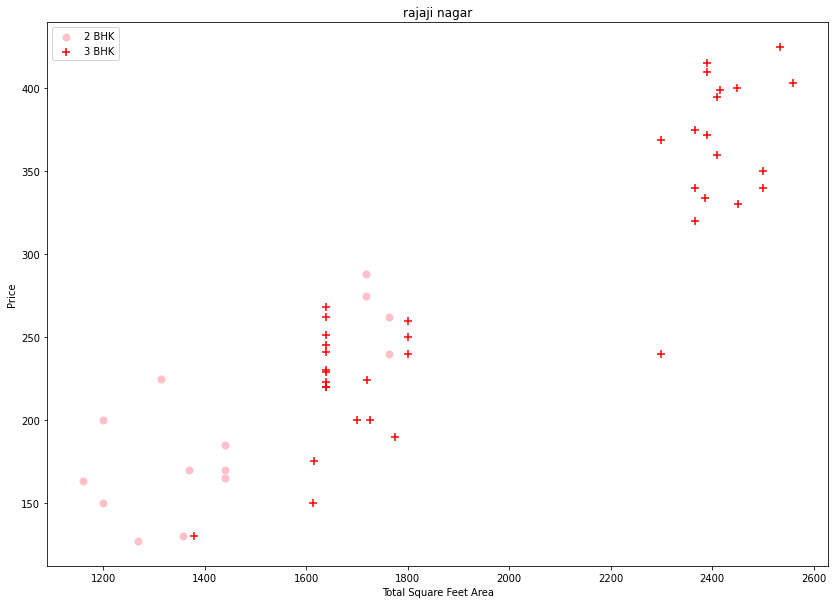

In [88]:
#there are many 3 bhk flats with price lower than 2 bhk flats. This seems to be an anomaly. So this should be handled

def plt_scatter(df,location):
    bhk2 = df[(df['location']==location ) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location ) & (df['bhk']==3)]
    plt.figure(figsize=(14,10))
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='pink',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],color='red',marker='+',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plt_scatter(df6,'rajaji nagar')

In [89]:
def remove_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk(df6)
df7.shape

(7342, 7)

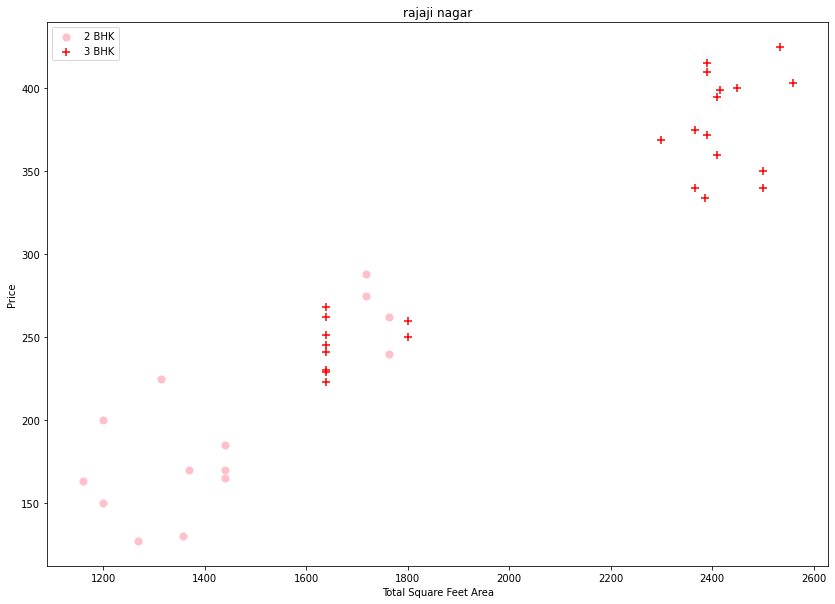

In [90]:
def plt_scatter(df,location):
    bhk2 = df[(df['location']==location ) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location ) & (df['bhk']==3)]
    plt.figure(figsize=(14,10))
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='pink',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],color='red',marker='+',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plt_scatter(df7,'rajaji nagar')

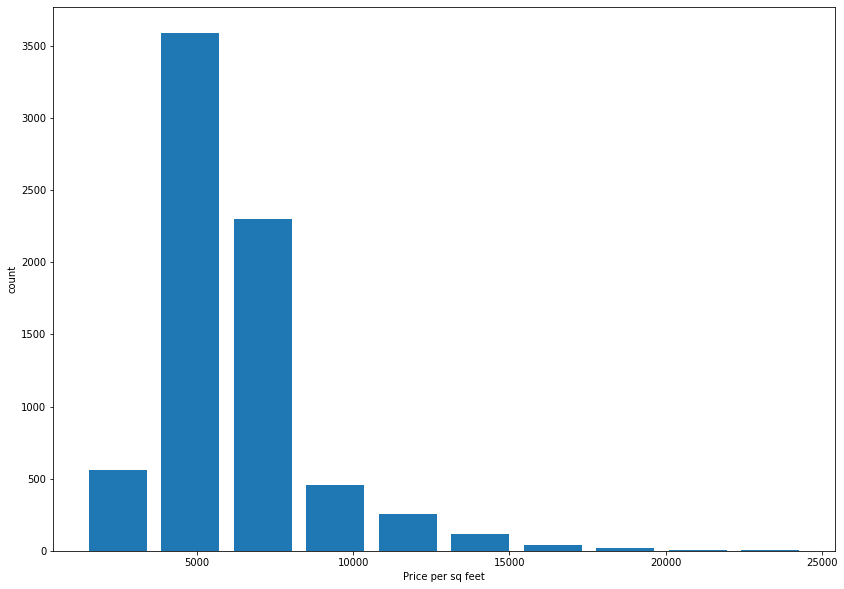

In [91]:
plt.figure(figsize=(14,10))
plt.hist(df7['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price per sq feet')
plt.ylabel('count')
plt.show()

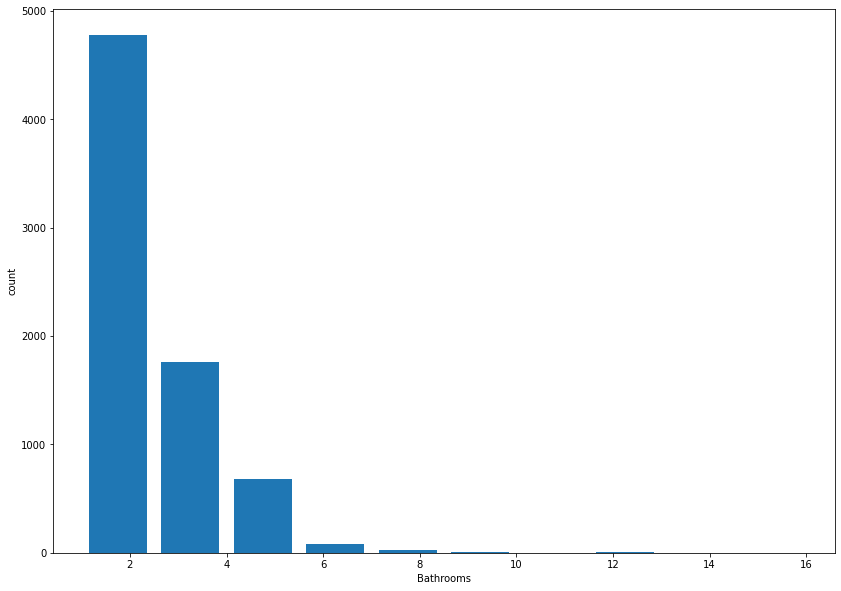

In [92]:
plt.figure(figsize=(14,10))
plt.hist(df7['bath'],rwidth=0.8)
plt.xlabel('Bathrooms')
plt.ylabel('count')
plt.show()

In [93]:
df7[df7['bath']>df7['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1610,chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5216,nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5848,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9016,thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [94]:
df8 = df7[df7['bath']<df7['bhk']+2]
df8.shape

(7264, 7)

# MODEL BUILDING

In [95]:
df9= df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
1,devarachikkanahalli,1250.0,2.0,40.0,2
2,devarachikkanahalli,1200.0,2.0,83.0,2
3,devarachikkanahalli,1170.0,2.0,40.0,2
4,devarachikkanahalli,1425.0,2.0,65.0,3
5,devarachikkanahalli,947.0,2.0,43.0,2


In [96]:
dummies = pd.get_dummies(df9['location'])
dummies

,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df10 = pd.concat([df9,dummies.drop('yeshwanthpur',axis='columns')],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,...,vidyaranyapura,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli
1,devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df10 = df10.drop('location',axis='columns')

In [99]:
df10.head(3)

,total_sqft,bath,price,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vidyaranyapura,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df10.shape

(7264, 245)

In [101]:
X = df10.drop('price',axis='columns')
X.head(2)

,total_sqft,bath,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vidyaranyapura,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
y = df10['price']
y.head(2)

1    40.0
2    83.0
Name: price, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [104]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8647998053150209

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [105]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score 

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84673354, 0.8505009 , 0.88195674, 0.78664901, 0.80331532])

# Find best model using GridSearchCV

In [106]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.833831,{'normalize': True}
1,lasso,0.730554,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.731576,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [109]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [110]:
predict_price('indira nagar',1000, 2, 2)

183.81505415071132

In [112]:
import pickle
with open('house_predict_model.pickle','wb') as f:
    pickle.dump(lr,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [113]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))